In [7]:
Instala la versión oficial de CMake desde la web
Esto no puede hacerse con pip (porque la de pip falla al compilar dlib).
Abre este enlace en tu navegador:
👉 https://cmake.org/download/
Descarga el instalador:
Windows x64 Installer (.msi)
Durante la instalación, marca esta opción:
Add CMake to the system PATH for all users
Cuando termine, cierra y reinicia Jupyter Notebook o todo el entorno. (mejor si reinicia el sistema completo)

Verifica desde el Notebook que CMake funciona
!cmake --version

Instala el compilador C++ (requisito de dlib)
Si aún no tienes Visual Studio Build Tools:
Descárgalos desde:
👉 https://visualstudio.microsoft.com/visual-cpp-build-tools/
Al abrir el instalador, marca “Desktop development with C++”
Espera a que finalice (esto instala MSVC + SDK + linker)

Instala dlib y face_recognition
!pip install --upgrade pip setuptools wheel
!pip install dlib
!pip install face_recognition matplotlib


     ---------------------------------------- 8.1/8.1 MB 22.6 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
     ---------------------------------------- 2.3/2.3 MB 48.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
def load_known_faces(folder_path):
    known_encodings = []
    known_names = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(folder_path, filename)
            image = face_recognition.load_image_file(image_path)
            
            face_encoding = face_recognition.face_encodings(image)
            
            if face_encoding:
                known_encodings.append(face_encoding[0])
                known_names.append(os.path.splitext(filename)[0])
    
    return known_encodings, known_names

In [11]:
def recognize_faces(image_path, known_encodings, known_names, tolerance=0.6):
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face_locations = face_recognition.face_locations(rgb_image)
    face_encodings = face_recognition.face_encodings(rgb_image, face_locations)
    
    face_names = []
    for face_encoding in face_encodings:
        distances = face_recognition.face_distance(known_encodings, face_encoding)
        min_distance = np.min(distances)
        
        if min_distance <= tolerance:
            name = known_names[np.argmin(distances)]
        else:
            name = "Desconocido"
        
        face_names.append(name)
    
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.rectangle(image, (left, bottom - 25), (right, bottom), (0, 255, 0), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 6, bottom - 6), font, 0.8, (255, 255, 255), 1)
    
    return image

In [12]:
known_faces_path = "known_faces"
known_encodings, known_names = load_known_faces(known_faces_path)

print(f"Rostros cargados: {len(known_encodings)}")
print("Nombres:", known_names)

Rostros cargados: 3
Nombres: ['persona2', 'persona3', 'persona4']


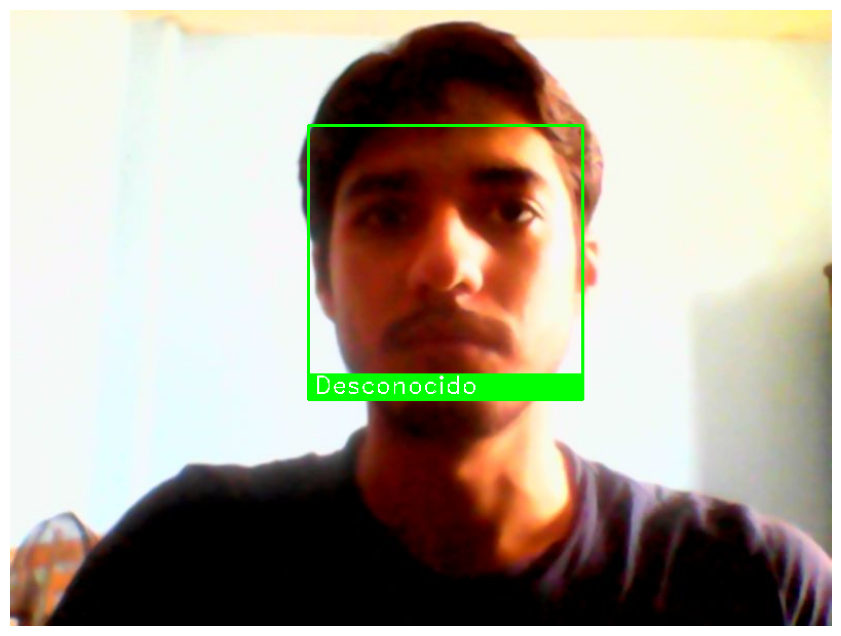

In [13]:
test_image_path = "test_image.jpg"
result_image = recognize_faces(test_image_path, known_encodings, known_names)

# Mostrar resultado
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()